# Principal Component Analysis (PCA)

### Introduction

<p> The purpose of this tutorial is to provide the reader with an intuitive understanding for principal component analysis (PCA). PCA is a multivariate data analysis technique mainly used for dimensionality reduction of large data sets. Working with large data sets is usually very complex as they contain large amount of information, which is difficult to comprehend. In order to find the patterns and correlations hidden on this data, PCA projects the original data into a variance space that contains a smaller number of latent variables called principal components. Each of these principal components, explain the amount of variation of the original data and it allows to explore how the instances differ from, and are similar to one another. </p>

<p> For this tutorial, you will use the libraries listed below, which are already installed in Anaconda:</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
import sklearn
from sklearn.decomposition import PCA

%matplotlib inline

<p>On this tutorial, we will go step by step on how to implement principal component analysis (PCA) and then, we will use the sklearn library to compare the results. This tutorial is composed by the following sections:</p>

<ol type="i" style="margin-top:-10px">
<li><a href="#Data Loading"> Data Loading</a></li>
<li><a href="#Data Processing"> Data Processing </a></li>
<ul padding=0px; display=inline; style="margin-top:0px" >
    <li type = "disc"> <a href="#Mean-Centering Data"> Mean-Centering Data </a></li>
    <li type = "disc"><a href="#Scaling Data"> Scaling Data </a></li>
</ul>
<li><a href="#Mathematical Computation"> Mathematical Computation </a></li>
<li><a href="#PCA with sklearn"> PCA with sklearn </a></li>
<li><a href="#Summary"> Summary </a></li>
<li><a href= "#References"> References </a></li>
</ol>

<a id="Data Loading"></a>

### Data Loading 

<p> The dataset that we will be exploring in this tutorial comes from the U.S Energy Information Administration website: <a href="http://www.eia.gov/"> www.eia.gov </a>. The data is provided in a weekly basis from February of 1991 to September of 2015 for the following variables with their respective units: </p>

<ul style="margin-left: 50px;">
    <li type = "disc"> Exports of Crude Oil (Thousand Barrels per Day) </li>
    <li type = "disc"> Commercial Crude Oil Imports Excluding SPR  (Thousand Barrels per Day) </li>
    <li type = "disc"> Ending Stocks of Crude Oil and Petroleum Products  (Thousand Barrels) </li>
    <li type = "disc"> Field Production of Crude Oil  (Thousand Barrels per Day) </li>
    <li type = "disc"> Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)</li>
    <li type = "disc"> Refiner Net Input of Crude Oil  (Thousand Barrels per Day) </li>
    <li type = "disc"> Cushing OK WTI Spot Price FOB  (Dollars per Barrel) </li>
    <li type = "disc"> Europe Brent Spot Price FOB  (Dollars per Barrel)</li>
</ul>

In [2]:
dataset  = pd.read_csv("tutorial_data1.csv") 
dataset.head()

,Exports of Crude Oil (Thousand Barrels per Day),Commercial Crude Oil Imports Excluding SPR (Thousand Barrels per Day),Ending Stocks of Crude Oil and Petroleum Products (Thousand Barrels),Field Production of CrudeOil (Thousand Barrels per Day),Ending Stocks excluding SPR of CrudeOil (Thousand Barrels),Refiner Net Input of CrudeOil (Thousand Barrels per Day),Cushing OK WTI Spot Price FOB (Dollars per Barrel),Europe Brent Spot Price FOB (Dollars per Barrel)
0,138,5542,1654304,7463,331172,12973,21.30,20.63
1,138,5527,1653683,7427,337091,12931,22.12,20.44
2,242,4934,1633707,7415,335996,13107,19.38,18.13
3,242,4983,1638352,7404,336208,13164,18.73,18.66
4,167,5430,1635503,7394,334536,13082,19.86,19.77


<p> Since the variables contain different dimensions, this will require some data processing that is described in the following section. </p>

<a id="Data Processing" style="margin-top:0px"></a>

### Data Processing

<a id="Mean-Centering Data"></a>

#### Mean-Centering Data

<p> The first step before applying PCA to a data matrix $X$ is to mean-center the data by making the mean of each variable to be zero. This is accomplished by finding the mean of each variable and substract it off to each of the instances belonging to that variable. </p>

In [3]:
dataset_center = (dataset - dataset.mean())
dataset_center.round(2).head()

,Exports of Crude Oil (Thousand Barrels per Day),Commercial Crude Oil Imports Excluding SPR (Thousand Barrels per Day),Ending Stocks of Crude Oil and Petroleum Products (Thousand Barrels),Field Production of CrudeOil (Thousand Barrels per Day),Ending Stocks excluding SPR of CrudeOil (Thousand Barrels),Refiner Net Input of CrudeOil (Thousand Barrels per Day),Cushing OK WTI Spot Price FOB (Dollars per Barrel),Europe Brent Spot Price FOB (Dollars per Barrel)
0,52.75,-2884.28,127.78,1227.84,-427.91,-1774.43,-26.54,-28.23
1,52.75,-2899.28,-493.22,1191.84,5491.09,-1816.43,-25.72,-28.42
2,156.75,-3492.28,-20469.22,1179.84,4396.09,-1640.43,-28.46,-30.73
3,156.75,-3443.28,-15824.22,1168.84,4608.09,-1583.43,-29.11,-30.20
4,81.75,-2996.28,-18673.22,1158.84,2936.09,-1665.43,-27.98,-29.09


<p> Now, we need to find the covariance matrix of our dataset to see how the variables are correlated to each other. This is described by the following equation:</p>

$$ Cov(X) = \dfrac{\sum_{i=1}^{N}(x_{i} - \bar{x})(y_{i} - \bar{y})}{N-1}$$

<p> where $N$ is the total number of rows, $\bar{x}$ and $\bar{y}$ are the means for the variables $x$ and $y$, respectively.</p>

In [4]:
data_cov = dataset_center.cov()
data_cov = data_cov - data_cov.mean()
data_cov.round(2).head()

,Exports of Crude Oil (Thousand Barrels per Day),Commercial Crude Oil Imports Excluding SPR (Thousand Barrels per Day),Ending Stocks of Crude Oil and Petroleum Products (Thousand Barrels),Field Production of CrudeOil (Thousand Barrels per Day),Ending Stocks excluding SPR of CrudeOil (Thousand Barrels),Refiner Net Input of CrudeOil (Thousand Barrels per Day),Cushing OK WTI Spot Price FOB (Dollars per Barrel),Europe Brent Spot Price FOB (Dollars per Barrel)
Exports of Crude Oil (Thousand Barrels per Day),-405872.54,1948196.83,-1.483328e+09,-5661084.60,-4.285119e+08,-2883878.42,-347436.54,-406584.55
Commercial Crude Oil Imports Excluding SPR (Thousand Barrels per Day),-476086.59,3927530.06,-1.488022e+09,-6719097.40,-4.447434e+08,-2233391.58,-332401.95,-391967.96
Ending Stocks of Crude Oil and Petroleum Products (Thousand Barrels),1010938.47,-1258779.62,8.177841e+09,16992778.38,1.742681e+09,13532083.13,2004988.54,2309666.39
Field Production of CrudeOil (Thousand Barrels per Day),-337714.44,1028556.17,-1.462023e+09,-4672049.89,-4.073858e+08,-2861729.34,-350163.73,-407914.76
Ending Stocks excluding SPR of CrudeOil (Thousand Barrels),1445176.01,-12362050.78,6.882989e+08,17247913.23,8.229114e+08,2362033.94,54314.43,102377.84


<p> The problem with the above matrix is that it depends on the units of the variables, so it is difficult to see the relationship between variables with different units. This requires you to scale the data and find the correlation matrix; which not only provides you with how the variables are related (positively/negatively), but also the degree to which they are related to each other.</p>

<p> <b>Note:</b> If the variables in your data set have the same units, you don't need to scale the data. This means that you can work with the covariance matrix.</p>

<a id="Scaling Data"></a>

#### Scaling Data

<p>Scaling the data to unit variance removes the problem of having variables with different dimensions. In addition, this ensures that we account for the variation of the instances, not for their magnitude. Below is the equation that describes this step:</p>

$$ x_{i,j} = \dfrac{{x_{i,j} - \bar{x_{j}}}}{\sqrt{\sum_{i=1}^{N}\dfrac{(x_{i,j} - \bar{x_{j}})^2}{N}}} $$

<p> where ${N}$ is the total number of rows, $\bar{x}$ is the mean of column $j$, and $i$ and $j$ represent the row and column number, respectively. </p>

In [5]:
# Scale data, ddof is set to 0 since we are using N not (N-1); which is the default for std in pandas
dataset_scale = (dataset_center)/(dataset_center.std(ddof = 1))
# Correlation matrix
data_corr = dataset_scale.corr()

#Changing the names for the columns and indexes
data_corr.columns = ['Exports of Crude Oil', 'Imports Excluding SPR', 'Ending Stocks of Crude Oil',
                    'Field Production', 'Ending Stocks excluding SPR', 'Refiner Net Input', 'WTI Spot', 'Brent Spot' ]
data_corr.index = ['Exports of Crude Oil', 'Imports Excluding SPR', 'Ending Stocks of Crude Oil',
                    'Field Production', 'Ending Stocks excluding SPR', 'Refiner Net Input', 'WTI Spot', 'Brent Spot' ]

data_corr.round(2)

,Exports of Crude Oil,Imports Excluding SPR,Ending Stocks of Crude Oil,Field Production,Ending Stocks excluding SPR,Refiner Net Input,WTI Spot,Brent Spot
Exports of Crude Oil,1.00,-0.46,0.15,0.78,0.55,0.12,-0.17,-0.15
Imports Excluding SPR,-0.46,1.00,-0.02,-0.69,-0.29,0.55,0.33,0.29
Ending Stocks of Crude Oil,0.15,-0.02,1.00,0.22,0.62,0.19,0.76,0.78
Field Production,0.78,-0.69,0.22,1.00,0.63,0.04,-0.10,-0.05
Ending Stocks excluding SPR,0.55,-0.29,0.62,0.63,1.00,0.17,0.36,0.41
Refiner Net Input,0.12,0.55,0.19,0.04,0.17,1.00,0.34,0.34
WTI Spot,-0.17,0.33,0.76,-0.10,0.36,0.34,1.00,0.99
Brent Spot,-0.15,0.29,0.78,-0.05,0.41,0.34,0.99,1.00


<a id="Mathematical Computation"></a>

### Mathematical Computation

<p> The next step is to find the eigenvalues and eigenvectors of our matrix. But before doing so, we will need to go over some linear algebra concepts that are essential for understanding PCA. As mentioned in the introduction, PCA is a projection method that maps the data into a different space whose axes are called principal components (PC). In order to do so, eigendecomposition is applied to the covariance matrix (in our case, the correlation matrix):</p> 

$$Cov(X) = V\Lambda V^{-1} $$

<p>where $V$ is a square matrix whose rows represent the eigenvectors of $Cov(X)$, and $\Lambda$ is a diagonal matrix whose diagonal elements are the eigenvalues of $Cov(X)$. The eigenvectors $v_{1}, v_{2},..., v_{n}$ are produced by the linear combination of the original variables $X_{1}, X_{2},..., X_{p}$ as shown below:</p>

$$v_{n} = w_{n1}X_{1} + w_{n2}X_{2} + ... + w_{np}X_{p}$$

<p> where $w_{np}$ represents the weight of each variable and the eigenvectors are the actual principal components.</p>

In [6]:
# Finding eigenvalues(w) and eigenvectors(v)
w, v = np.linalg.eig(data_corr)
print "Eigenvalues:" 
print w.round(3)
print "Eigenvectors:"
print v.round(3)

Eigenvalues:
[ 3.222  2.806  1.14   0.008  0.08   0.309  0.187  0.249]
Eigenvectors:
[[-0.104  0.492 -0.347 -0.042  0.192 -0.114  0.18   0.736]
 [-0.081 -0.5   -0.401 -0.018 -0.594 -0.412  0.162  0.184]
 [-0.498  0.044  0.234  0.013 -0.161 -0.159 -0.772  0.218]
 [-0.142  0.539 -0.133  0.03  -0.673  0.403  0.077 -0.222]
 [-0.387  0.335 -0.034  0.032  0.154 -0.652  0.223 -0.488]
 [-0.254 -0.149 -0.763  0.01   0.315  0.293 -0.276 -0.265]
 [-0.495 -0.214  0.172  0.693  0.073  0.246  0.341  0.129]
 [-0.505 -0.187  0.183 -0.718  0.054  0.244  0.311  0.047]]


<p> The eigenvalues represent the amount of variation contained by each of the principal components. The purpose of finding these values is to obtain the number of components that provide a reasonable generalization of the entire data set; which would be less than the total number of variables in the data. In order to determine the number of components that account for the largest variation in our data set, the scree plot is implemented as shown in the chart below:  </p>

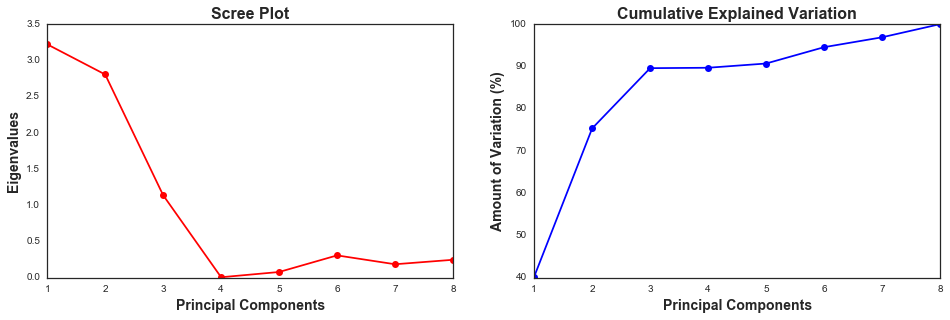

In [7]:
plt.figure(figsize=(16,10))
# Scree Plot
plt.subplot(221)
plt.plot([1,2,3,4,5,6,7,8], w, 'ro-')
plt.title('Scree Plot', fontsize=16, fontweight='bold')
plt.xlabel('Principal Components', fontsize=14, fontweight='bold')
plt.ylabel('Eigenvalues', fontsize=14, fontweight='bold')

# Cumulative Explained Variation 
plt.subplot(222)
plt.plot([1,2,3,4,5,6,7,8], (w*100/sum(w)).cumsum(), 'bo-')
plt.title('Cumulative Explained Variation', fontsize=16, fontweight='bold')
plt.xlabel('Principal Components', fontsize=14, fontweight='bold')
plt.ylabel('Amount of Variation (%)', fontsize=14, fontweight='bold')

<p> As you can see in the scree plot, the value of the eigenvalues drop significantly between PC3 and PC4 and it is not very clear how many components represent the data set. As a result, the cumulative explained variation is plotted and it clearly shows that the first 3 components account for approximately 90% of the variation of the data. <br>
Now that we have determined the number of PCs, we can map the scale data into the new coordinate system governed by the principal components. This mapped dataset is called in PCA, the scores:</p>

$$ scores = XV^{T} $$

<p>where $V$ is a matrix with the number of PCs that explain most of the variation of the data. For visualization purposes, we will only use the first two components which account for ~ 75% of the total variation.</p>

In [27]:
# Scores
scores = (dataset_scale.as_matrix()).dot(v[:,:2])
scores

array([[ 1.28881571,  2.58539236],
       [ 1.23529003,  2.63038672],
       [ 1.29608702,  3.35400166],
       ..., 
       [-3.39489928,  4.92057914],
       [-3.45961704,  4.93657062],
       [-3.35244805,  4.98731342]])

<p>Having the scores allows us to observe the direction of the principal components in the x-y axis as shown in the following graph:</p>

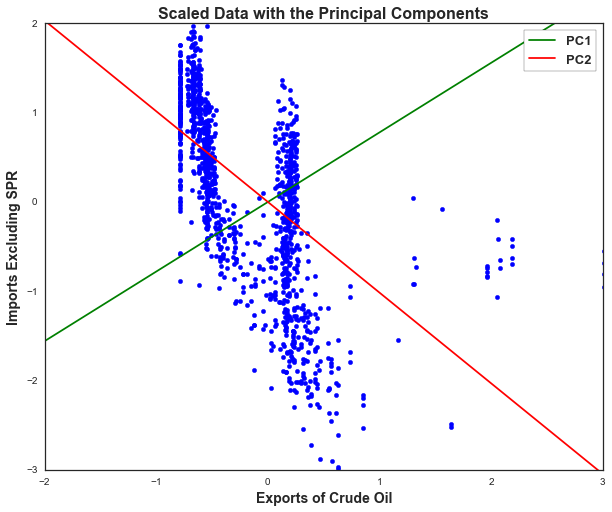

In [33]:
plt.figure(figsize=(10,8))

# Principal Components
pc1 = v[:, 0]
pc2 = v[:, 1]

pc1x = []
pc2x = []
pc1y = []
pc2y = []

# Plotting the scaled data and getting the values of the PCs
for ii, jj in zip(scores, dataset_scale.as_matrix()):
    pc1x.append(pc1[0]*ii[0]), pc1y.append(pc1[1]*ii[0])
    pc2x.append(pc2[0]*ii[1]), pc2y.append(pc2[1]*ii[1])
    plt.scatter(jj[0], jj[1], color = 'b', marker = 'o')

# Fitting PC1 as a line
fit_pc1 = np.polyfit(pc1x, pc1y, 1)
line_pc1 = np.poly1d(fit_pc1)
new_points_pc1 = np.arange(-2,4)
plt.plot(new_points_pc1, line_pc1(new_points_pc1), 'g-', label= "PC1")

# Fitting PC2 as a line
fit_pc2 = np.polyfit(pc2x, pc2y, 1)
line_pc2 = np.poly1d(fit_pc2)
new_points_pc2 = np.arange(-2,4)
plt.plot(new_points_pc2, line_pc2(new_points_pc2), 'r-', label= "PC2")

plt.xlim([-2, 3])
plt.ylim([-3, 2])
plt.title('Scaled Data with the Principal Components', fontsize=16, fontweight='bold')
plt.xlabel('Exports of Crude Oil', fontsize=14, fontweight='bold')
plt.ylabel('Imports Excluding SPR', fontsize=14, fontweight='bold')
plt.legend(prop={'size':13, 'weight':'bold'}, frameon=True)

<p>As you can see above, the principal components are orthogonal (perpendicular) to each other, which is expected as this is an attribute of eigenvectors. Visually, PC1 and PC2 seem to capture a similar amount of variation and this correlates with the eigenvalues obtained whose values are 3.222 and 2.806 for PC1 and PC2, respectively.</p>

<p>Now we will use the most important visualization plot of PCA, called the biplot. Here we will plot the scores along with the weights of the principal components, which are also called the loadings and represent the direction of the variables of $X$. The scores are plotted as data points, while the loadings will be plotted as vectors</p>

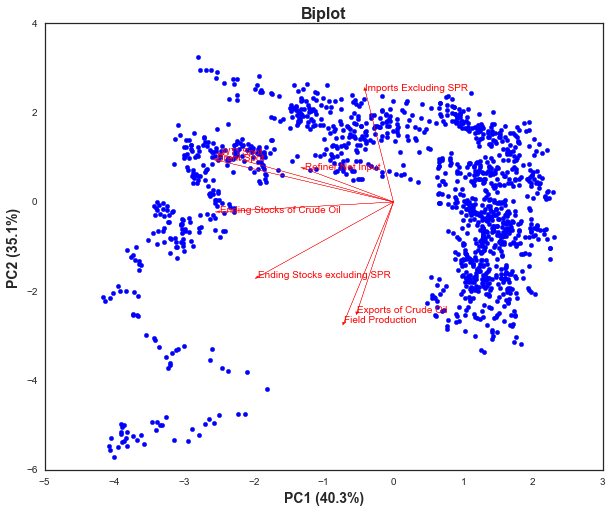

In [28]:
plt.figure(figsize=(10,8))
for i in scores:
    plt.scatter(i[0], i[1], color = 'b')

plt.xlim([-5, 3])
plt.ylim([-6, 4])
plt.title('Biplot', fontsize=16, fontweight='bold')
plt.xlabel('PC1 (40.3%)', fontsize=14, fontweight='bold')
plt.ylabel('PC2 (35.1%)', fontsize=14, fontweight='bold')

# Labels for the loadings
names  = list(data_corr.columns)
#Transposing the eigenvectors
v_t = v[:,:2]
pc_1 = v_t[:, 0]
pc_2 = v_t[:, 1]

# Plotting the loadings as vectors
# The vectors are multiply by 4 due to visualization purposes
for i in range(len(pc_1)):
    plt.arrow(0, 0, pc_1[i]*5, pc_2[i]*5, color='r', width=0.002, head_width=0.045)
    plt.text(pc_1[i]*5, pc_2[i]*5, names[i], color='r')

<p>As you can see above, some of the variables are close to each other and this means that they are strongly related to one another. The actual correlation can be obtained by calculating the cosine of the angle between the variables. In addition, you can look back at the correlation matrix to see if those variables have a strong correlation. For example, the WTI and Brent spot prices vectors are very close to each other and their correlation value in the correlation matrix is 99%. The data points on the right-hand side of the plot, will certainly have low values as they are in the opposite direction of the variables.</p>

<a id="PCA with sklearn"></a>

### PCA with sklearn

<p>On this section, we will apply PCA directly to the scaled data using the sklearn decomposition library. First, define the number of components that you want (from the previous section, we found that 3 components explained most of the variation of the data, but 2 were chosen for visualization purposes).</p>

In [17]:
pca = PCA(n_components=2)

<p>Second, fit the scaled data to PCA to find the eigenvalues and eigenvectors</p>

In [18]:
pca.fit(dataset_scale.as_matrix())
# Eigenvectors
print "Eigenvectors:"
print pca.components_
print 
# Eigenvalues
print "Eigenvalues:"
print pca.explained_variance_
print 
# Variance explained
print "Amount of variance explained per component (%)"
print pca.explained_variance_ratio_*100

Eigenvectors:
[[-0.10390372 -0.08094858 -0.4979827  -0.14178406 -0.38709197 -0.25433889
  -0.4946933  -0.50528402]
 [-0.49233521  0.49995417 -0.04365996 -0.53907923 -0.33467661  0.14923826
   0.21430968  0.18689607]]

Eigenvalues:
[ 3.21945411  2.80348497]

Amount of variance explained per component (%)
[ 40.27451837  35.07085462]


<p> This is also a good way to check if our procedure was correct. If you look back into the <a href="#Mathematical Computation"> Mathematical Computation </a>section, you will see that the values match! Next, apply dimensionality reduction to the data to obtain the scores. </p>

In [19]:
# Apply dimensionality reduction (Finding the scores)
scores_sk = pca.transform(dataset_scale.as_matrix())
print scores_sk

[[ 1.28881571 -2.58539236]
 [ 1.23529003 -2.63038672]
 [ 1.29608702 -3.35400166]
 ..., 
 [-3.39489928 -4.92057914]
 [-3.45961704 -4.93657062]
 [-3.35244805 -4.98731342]]


<p>Last, get the biplot with the values obtained in this section. </p>

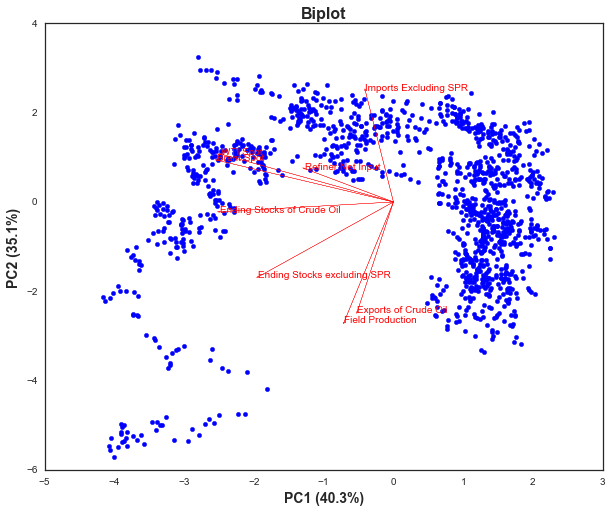

In [17]:
plt.figure(figsize=(10,8))
for i in scores_sk:
    plt.scatter(i[0], i[1], color = 'b')

# Assigning the PCs 
pc1_sk = pca.components_[0]
pc2_sk = pca.components_[1]
    
plt.title('Biplot', fontsize=16, fontweight='bold')
plt.xlabel('PC1 (40.3%)', fontsize=14, fontweight='bold')
plt.ylabel('PC2 (35.1%)', fontsize=14, fontweight='bold')
plt.xlim([-5, 3])
plt.ylim([-6, 4])

# Labels for the loadings
names  = list(data_corr.columns)

# Plotting the loadings as vectors 
for i in range(len(pc1_sk)):
    plt.arrow(0, 0, pc1_sk[i]*5, pc2_sk[i]*5, color='r', width=0.002, head_width=0.025)
    plt.text(pc1_sk[i]*5, pc2_sk[i]*5, names[i], color='r')

<a id="Summary"></a>

### Summary

<p>Principal component analysis is a powerful technique that allows you to find the hidden patterns and correlations of a data set through dimensionality reduction. Dimensionality reduction is accomplished by finding the eigenvectors that explain the largest variance of the data. In practice, the first two components usually account for most of the variation of the data. To visualize the data in the coordinate system governed by the principal components, the biplot is implemented. This visualization plot allows to see the correlations between the new data (or rotated data) as data points along with the variables of the original data set as vectors. 
On this tutorial, PCA was implemented step by step with the only purpose of given the reader a deep understanding of this technique. Then, the sklearn library for PCA was used to compare the results.</p>

<a id="References"></a>

### References

<ol style="1" margin-top="-10px">
    <li> <a href=https://datajobs.com/data-science-repo/PCA-Tutorial-[Shlens].pdf> A Tutorial on Principal Component Analysis</a></li>
    <li><a href=https://www.researchgate.net/profile/Kim_Esbensen/publication/222347483_Principal_Component_Analysis/links/00b4952c66e796fc2d000000.pdf> Principal Component Analysis </a></li>
    <li> <a href=http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html> sklearn library for PCA</a></li>
    <li><a href=http://www.wiley.com/WileyCDA/WileyTitle/productCd-0471489786.html>
    Chemometrics: Data Analysis for the Laboratory and Chemical Plant</a></li>
    <li><a href=https://www.youtube.com/watch?v=5zk93CpKYhg> PCA tutorial in R </a></li>
</ol>